# DATA ANALYSIS and VISUALIZATION

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import preprocessor as p
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS
import re
import string
#from mpl_toolkits.basemap import Basemap
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from datetime import datetime


In [2]:
#Opening my raw JSON Files
import json
tweets_data = []

# Open connection to file
with open('sample_tweets8.json', 'r') as tweets_file:
    # Read in tweets and store in list
    for line in tweets_file:
        tweet = json.loads(line)
        tweets_data.append(tweet)

In [3]:
#Opening my raw JSON Files
import json
tweets_data2 = []

# Open connection to file
with open('sample_tweets9.json', 'r') as tweets_file:
    # Read in tweets and store in list
    for line in tweets_file:
        tweet = json.loads(line)
        tweets_data2.append(tweet)

In [4]:
#function to determine retweets
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

In [5]:
#function to determine replies
def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

In [6]:
# function to determin device of tweeters
def reckondevice(tweet):
    if 'iPhone' in tweet['source'] or ('iOS' in tweet['source']):
        return 'iPhone'
    elif 'Android' in tweet['source']:
        return 'Android'
    elif 'Mobile' in tweet['source'] or ('App' in tweet['source']):
        return 'Mobile device'
    elif 'Mac' in tweet['source']:
        return 'Mac'
    elif 'Windows' in tweet['source']:
        return 'Windows'
    elif 'Bot' in tweet['source']:
        return 'Bot'
    elif 'Web' in tweet['source']:
        return 'Web'
    elif 'Instagram' in tweet['source']:
        return 'Instagram'
    elif 'Blackberry' in tweet['source']:
        return 'Blackberry'
    elif 'iPad' in tweet['source']:
        return 'iPad'
    elif 'Foursquare' in tweet['source']:
        return 'Foursquare'
    else:
        return '-'

In [7]:
#Transforming into a DATAFRAME for analysis 
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['device'] = list(map(reckondevice, tweets_data))
tweets['RT'] = list(map(is_RT, tweets_data))
tweets['Reply'] = list(map(is_Reply_to, tweets_data))





In [8]:
#Transforming into a DATAFRAME for analysis 
tweets2 = pd.DataFrame()
tweets2['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data2))
tweets2['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data2))
tweets2['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data2))
tweets2['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data2))
tweets2['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data2))
tweets2['device'] = list(map(reckondevice, tweets_data2))
tweets2['RT'] = list(map(is_RT, tweets_data2))
tweets2['Reply'] = list(map(is_Reply_to, tweets_data2))



In [9]:
#combining both data
all= pd.concat([tweets, tweets2])

In [10]:
#How many retweets?
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 48% of all the tweets


In [11]:
#How many replies?
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of retweets is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 15% of all the tweets


In [12]:
#How many mentions?
mention_tweets = tweets[~tweets['text'].str.contains("RT")  & tweets['text'].str.contains("@")]
print(f"The percentage of retweets is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 18% of all the tweets


In [13]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@")  & ~tweets['text'].str.contains("RT")]
print(f"The percentage of retweets is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 34% of all the tweets


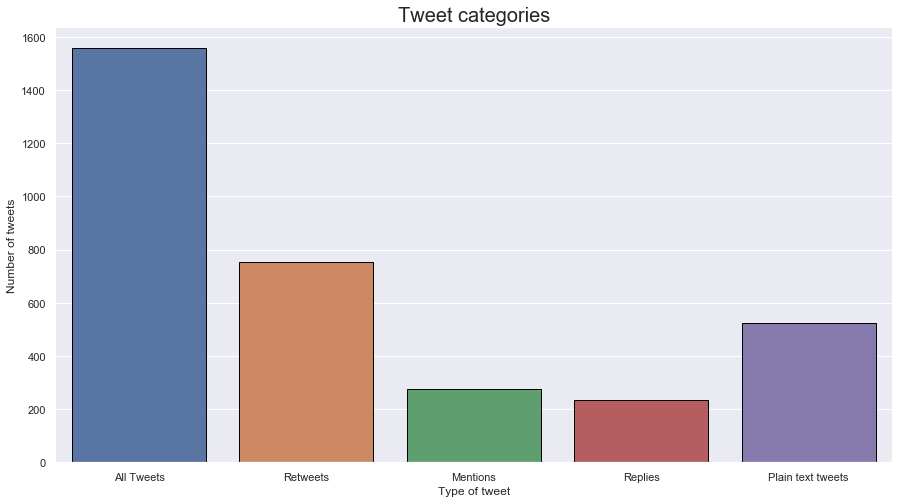

In [14]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [15]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [16]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

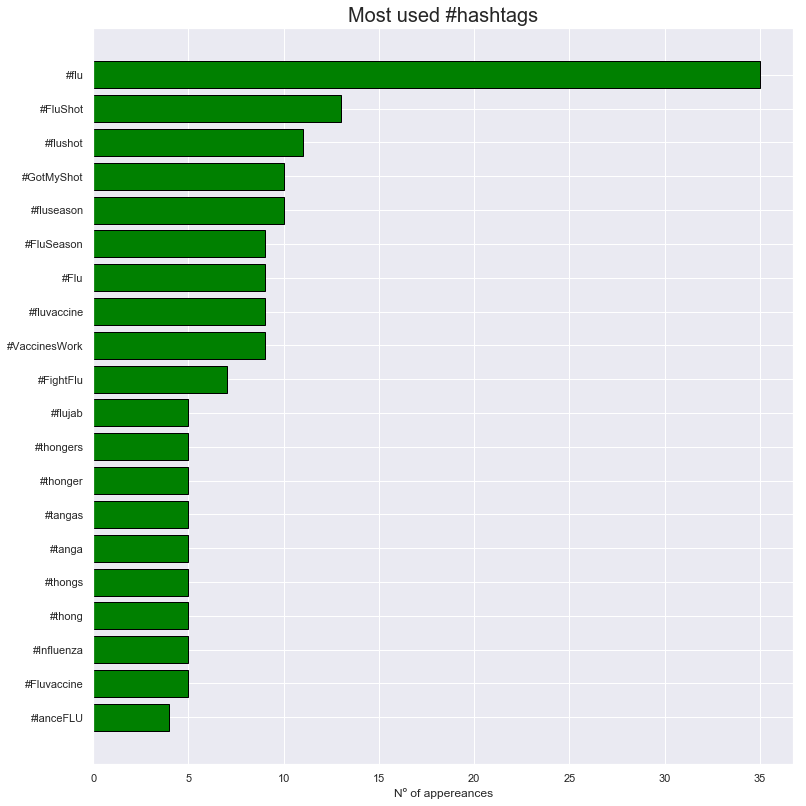

In [17]:
import numpy as np
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

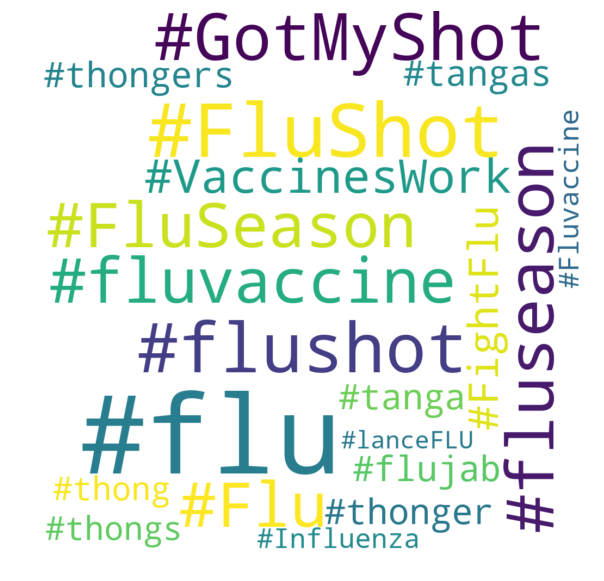

In [18]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [19]:
#look at how long tweets are
all['count']=all.text.str.len()

In [20]:
all.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply,count
0,RT @HockeyinVegas: The @GoldenKnights' Marc-A...,VGKWarMachine,Tue Nov 05 00:39:21 +0000 2019,140,"Las Vegas, NV",iPhone,True,None,140
1,By • @ismailaydin1903 #flu ama çok güzel 1deme...,silbigg,Tue Nov 05 00:39:33 +0000 2019,90,"Estambul, Turquía",Instagram,False,None,90
2,RT @JoMartin_path: Really good to have a visit...,JulianBurton15,Tue Nov 05 00:39:34 +0000 2019,140,"Sheffield, England",Mobile device,True,None,140
3,Mário queria o Diniz e o Celso não. Celso não ...,cadinelli7,Tue Nov 05 00:39:37 +0000 2019,117,None,Android,False,None,117
4,Achei a coisa mais linda porem meu filho vai t...,amandamariahhh,Tue Nov 05 00:39:41 +0000 2019,66,"Joinville, Santa Catarina",iPhone,False,None,66


In [21]:
# doing some quick cleaning before more analysis 
stopword = nltk.corpus.stopwords.words('english')

def remove_mentionsURLs(text):
    tweet_out= re.sub(r'@[A-Za-z0-9]+', '', text)
    tweet_out=re.sub(r'http\S+', '', tweet_out)
    tweet_out= re.sub(r'RT @[\w_]+:', '', tweet_out)
    return tweet_out

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def remove_RT(text):
    text= re.sub(r'\b\w{1,2}\b', '', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

all['text_noURLs'] = all['text'].apply(lambda x: remove_mentionsURLs(x)) 
all['text_punct'] = all['text_noURLs'].apply(lambda x: remove_punct(x))
all['text_removeRT'] = all['text_punct'].apply(lambda x: remove_RT(x))

In [22]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

all['tokenized'] = all['text_removeRT'].apply(lambda x: tokenization(x))

In [23]:
all.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply,count,text_noURLs,text_punct,text_removeRT,tokenized
0,RT @HockeyinVegas: The @GoldenKnights' Marc-A...,VGKWarMachine,Tue Nov 05 00:39:21 +0000 2019,140,"Las Vegas, NV",iPhone,True,None,140,RT : The ' Marc-Andre Fleury was a full parti...,RT The MarcAndre Fleury was a full particip...,The MarcAndre Fleury was full participant...,"[, The, MarcAndre, Fleury, was, full, particip..."
1,By • @ismailaydin1903 #flu ama çok güzel 1deme...,silbigg,Tue Nov 05 00:39:33 +0000 2019,90,"Estambul, Turquía",Instagram,False,None,90,By • #flu ama çok güzel 1demetozdemir #erkenc...,By • flu ama çok güzel demetozdemir erkencikuş,• flu ama çok güzel demetozdemir erkencikuş,"[, flu, ama, çok, güzel, demetozdemir, erkenci..."
2,RT @JoMartin_path: Really good to have a visit...,JulianBurton15,Tue Nov 05 00:39:34 +0000 2019,140,"Sheffield, England",Mobile device,True,None,140,RT _path: Really good to have a visit from Chi...,RT path Really good to have a visit from Chief...,path Really good have visit from Chief Medi...,"[, path, Really, good, have, visit, from, Chie..."
3,Mário queria o Diniz e o Celso não. Celso não ...,cadinelli7,Tue Nov 05 00:39:37 +0000 2019,117,None,Android,False,None,117,Mário queria o Diniz e o Celso não. Celso não ...,Mário queria o Diniz e o Celso não Celso não q...,Mário queria Diniz Celso não Celso não quer...,"[Mário, queria, Diniz, Celso, não, Celso, não,..."
4,Achei a coisa mais linda porem meu filho vai t...,amandamariahhh,Tue Nov 05 00:39:41 +0000 2019,66,"Joinville, Santa Catarina",iPhone,False,None,66,Achei a coisa mais linda porem meu filho vai t...,Achei a coisa mais linda porem meu filho vai t...,Achei coisa mais linda porem meu filho vai to...,"[Achei, coisa, mais, linda, porem, meu, filho,..."


### let's look at the top words 

flu 1843
the 1110
fla 965
you 514
and 506
your 380
get 357
shot 354
for 348
this 278
with 232
have 219
que 213
are 198
that 183
can 175
sick 168
cold 160
não 157
when 152


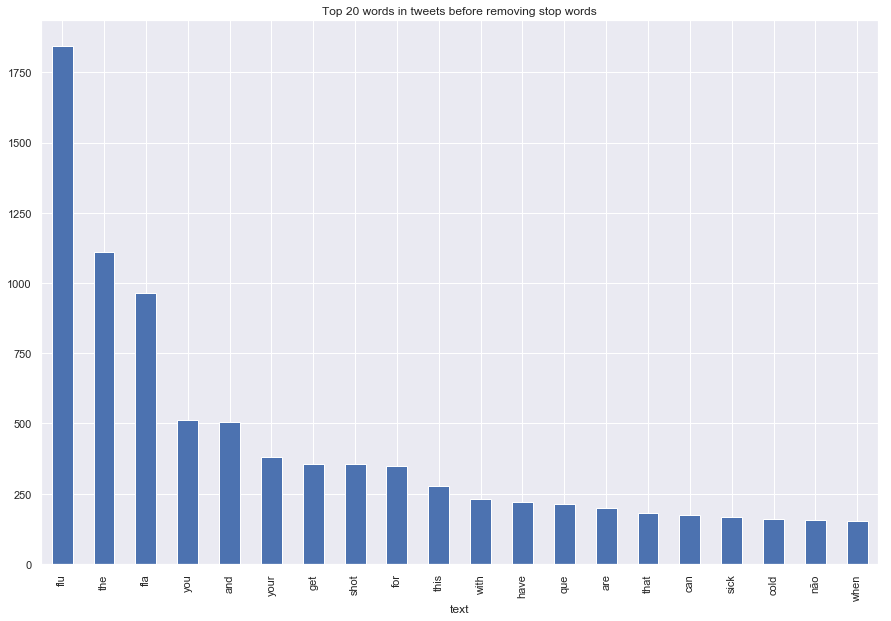

In [24]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(all['text_removeRT'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words in tweets before removing stop words')
plt.show()


flu 1843
fla 965
shot 354
que 213
sick 168
cold 160
não 157
got 149
shots 131
amp 128
love 123
mais 118
são 117
com 113
avaí 112
vas 109
inter 108
time 107
cru 105
fucking 104


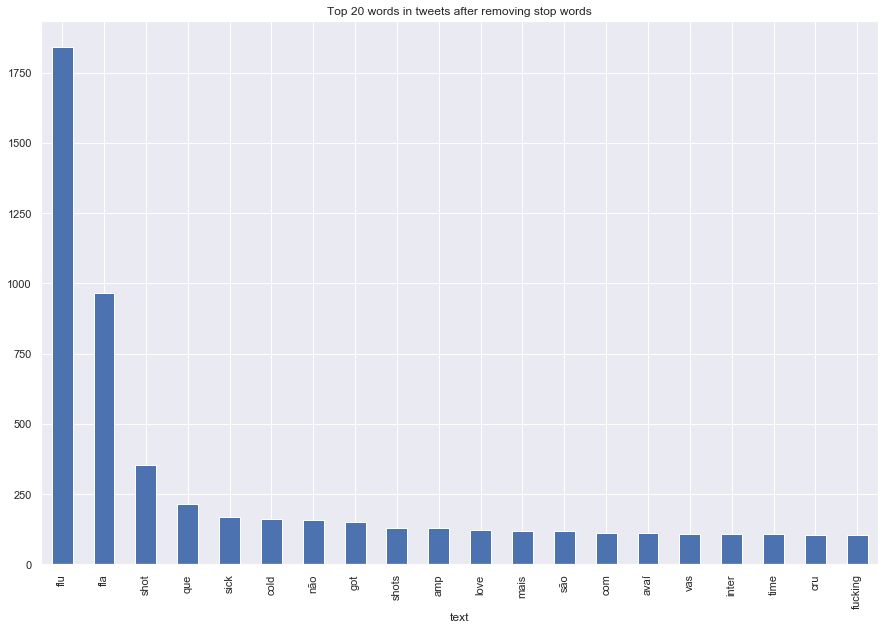

In [25]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(all['text_removeRT'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in tweets after removing stop words')
plt.show()

the flu 377
flu shot 343
fla fla 309
flu shots 123
for the 111
fla gre 103
gre vas 103
vas fla 103
fla cea 103
cea fla 103
fla pal 103
pal avaí 103
avaí fla 103
fla san 103
san cru 103
cru fla 103
fla inter 103
inter fla 103
fla chap 103
you are 99


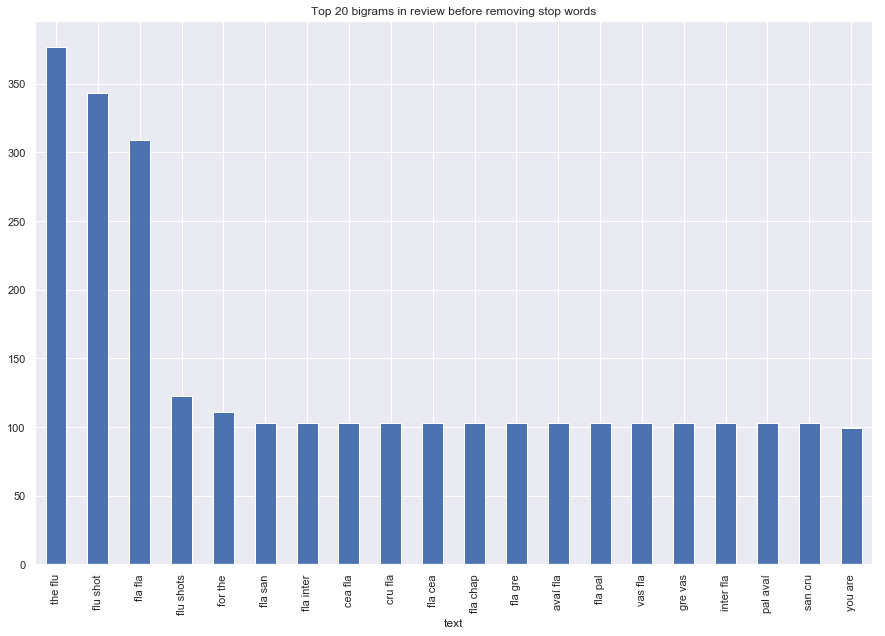

In [26]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(all['text_removeRT'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')
plt.show()

flu shot 344
fla fla 309
flu shots 123
cold flu 117
fla gre 103
gre vas 103
vas fla 103
fla cea 103
cea fla 103
fla pal 103
pal avaí 103
avaí fla 103
fla san 103
san cru 103
cru fla 103
fla inter 103
inter fla 103
fla chap 103
são paulo 89
sick cold 87


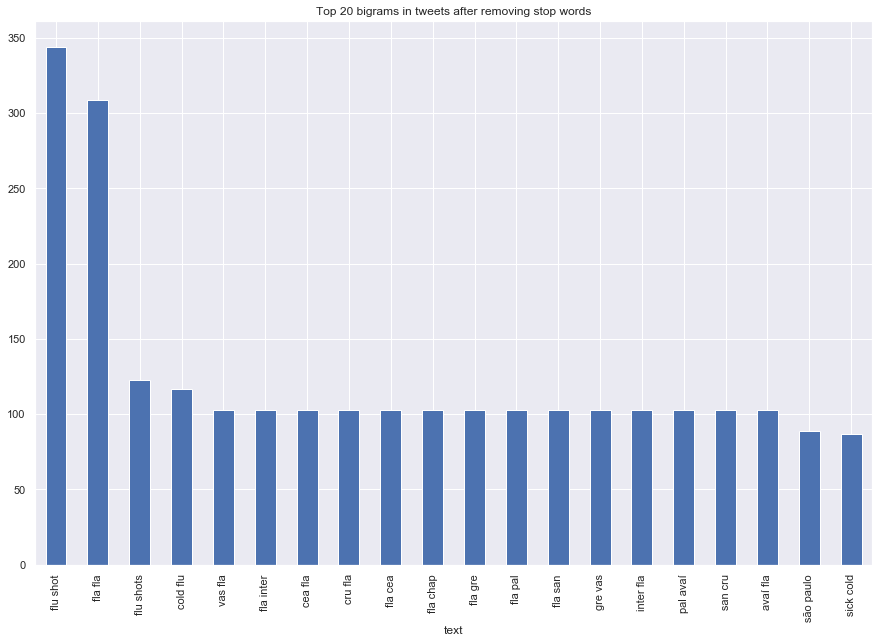

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(all['text_removeRT'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in tweets after removing stop words')
plt.show()

### The tweets that are seen here have many slang terms and words that are not in English. It is especially difficult to filter only the English language and clean tweets are not in English. While manually labeling the data (seen in the next notebook), I've manually removed tweets that are not in English. We can compare the n-grams result there. 